In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


# **Car Price Prediction**

### **Importing Libraries**

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### **Importing dataset** 

In [3]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

In [4]:
# Having a look into data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Checking shape(rows, columns) of data 
df.shape

(301, 9)

In [6]:
# Checking for dtypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Printing unique values for ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner'] columns as other remaining columns could contaion highly variable values.

In [7]:
for i in df:
    if i in ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner']:
        print("Unique values for",i, "--->" ,df[i].unique(), ",and those are total :", df[i].nunique(), end = "\n\n") 
      

Unique values for Year ---> [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007] ,and those are total : 16

Unique values for Fuel_Type ---> ['Petrol' 'Diesel' 'CNG'] ,and those are total : 3

Unique values for Seller_Type ---> ['Dealer' 'Individual'] ,and those are total : 2

Unique values for Transmission ---> ['Manual' 'Automatic'] ,and those are total : 2

Unique values for Owner ---> [0 1 3] ,and those are total : 3



In [8]:
# Checking for missing or null Values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Checkign Statistical values 
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Removing "Car_Name" in new dataset as its not required for current scenario as it would not help much in prediction the preuce of car as car has a unique name.

In [10]:
df1 = df.drop('Car_Name', axis=1)

In [11]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# Creating new column to get new derived column from 'Year' and 'Current_Year' as "No_Of_Year"
df1['Current_Year'] = 2024

In [13]:
# Creating new column named 'No_of_Years' so that we can use this measure for prediction of price in to current year
df1['No_of_Years'] = df1['Current_Year'] - df1['Year']

In [14]:
df1.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [15]:
# Dropping 'Year' and 'Current_Year' as those won't be the measure used for prediction of price
df1.drop(columns=(['Year', 'Current_Year']), axis = 1, inplace = True)

### **Converting Nominal/Categorical Data to Numerical datatype**

In [16]:
# get_dummies helps to convert categorical into numerical data type just like onehot encoding. 
df1=pd.get_dummies(df1, drop_first=True) 
# Here "drop_first=True" means that we drop first column of that column which gets converted to numerical one 

In [17]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [18]:
# Correlation between numerical columns
df1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


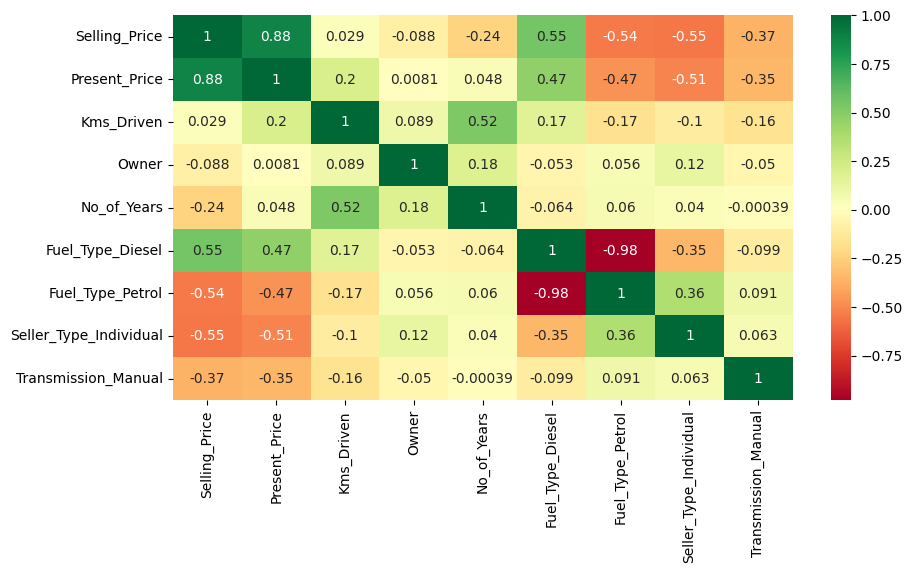

In [19]:
#Plotting Heatmap to check the correlation between each columns
corrmap = df1.corr()
top_corr_features = corrmap.index 
plt.figure(figsize=(10,5))
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## **Training the model**

### **Splitting the data into train_test_split model**

In [20]:
# Independent variables
X = df1.drop("Selling_Price", axis = 1)

# Dependent variables
y = df1['Selling_Price']

In [21]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,False,True,False,True
1,9.54,43000,0,11,True,False,False,True
2,9.85,6900,0,7,False,True,False,True
3,4.15,5200,0,13,False,True,False,True
4,6.87,42450,0,10,True,False,False,True


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### **Checking for Feature Importance**

In [23]:
## Feature Importance 
from  sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.38007551 0.04215565 0.00043459 0.07365521 0.22851056 0.00902271
 0.12806128 0.13808447]


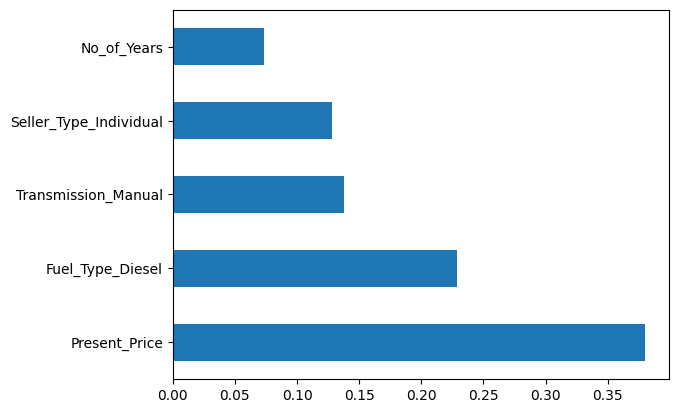

In [25]:
# Plotting the top 5 important features available
feature_importance =pd.Series(model.feature_importances_, index = X.columns)
feature_importance.nlargest(5).plot(kind = 'barh')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [27]:
x_train.shape

(240, 8)

In [28]:
x_test.shape

(61, 8)

In [29]:
y_test.shape

(61,)

In [30]:
y_train.shape

(240,)

### **Training the model - Linear Regression**

In [31]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

linr.fit(x_train, y_train)

LinearRegression()

In [32]:
# Predicting values for x_test
y_pred = linr.predict(x_test)

In [33]:
# printing out top 10 predicted values
y_pred[:10]

array([ 7.78311122,  0.80492133,  1.88830514,  2.05092328,  5.25115027,
        6.80264993, 19.67617202, -3.31906928,  1.01503656,  4.40955539])

In [34]:
# Verfying the test values with above predicted values
print(list(y_test[:10]), end = " ")

[8.4, 0.5, 2.55, 0.9, 4.8, 4.75, 19.99, 0.2, 0.75, 3.9] 

In [35]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

5.075348220392675


In [36]:
from sklearn import metrics
print('MSE---->', metrics.mean_squared_error(y_test, y_pred))
print('RMSE--->', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE----> 5.075348220392675
RMSE---> 2.2528533508403683


In [37]:
from sklearn.metrics import r2_score, adjusted_rand_score

print(r2_score(y_test, y_pred))

0.8436773164235075


<Axes: xlabel='Selling_Price', ylabel='Density'>

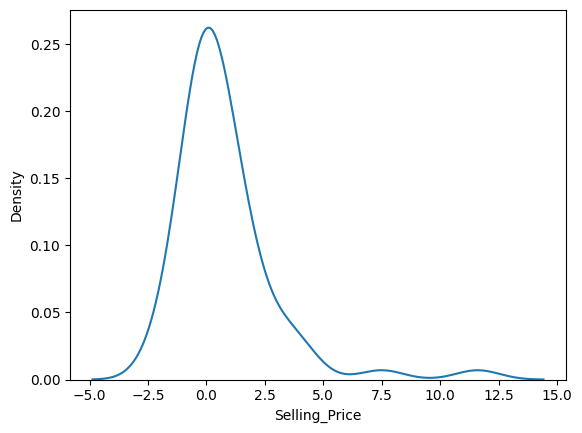

In [38]:
sns.kdeplot(y_test - y_pred)

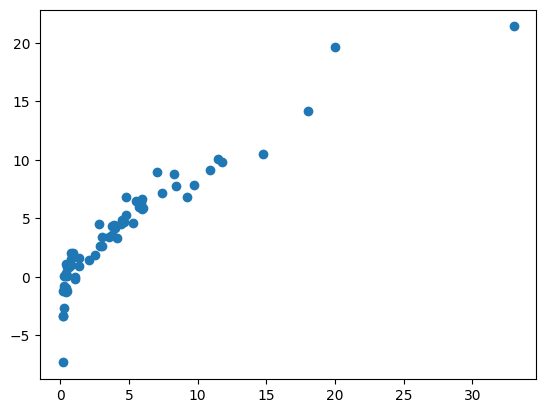

In [39]:
plt.scatter(y_test, y_pred) 

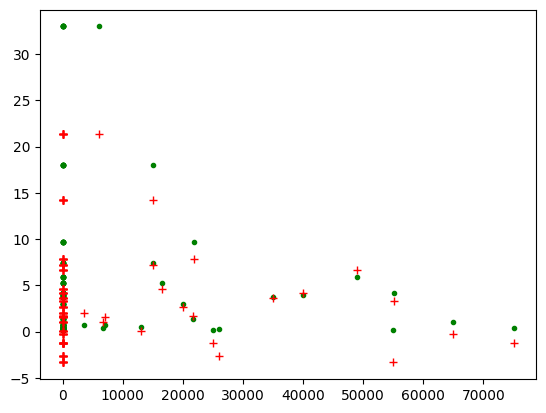

In [40]:
plt.plot(x_test[20:40], y_test[20:40], '.', color = 'green')
plt.plot(x_test[20:40], y_pred[20:40], '+', color = 'red')
plt.show()
# Red + represents Predicted values
# Green . represents Test values

------

### **Training the model - Random Forest**

In [41]:
from sklearn.ensemble import RandomForestRegressor

rnd = RandomForestRegressor()

In [42]:
rnd.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
y_pred = rnd.predict(x_test)

In [44]:
y_pred[:10]

array([ 9.1595,  0.6812,  2.5125,  0.7621,  5.179 ,  5.8411, 21.425 ,
        0.169 ,  0.574 ,  4.1255])

In [45]:
list(y_test[:10])

[8.4, 0.5, 2.55, 0.9, 4.8, 4.75, 19.99, 0.2, 0.75, 3.9]

In [46]:
from sklearn import metrics
print('MSE---->', metrics.mean_squared_error(y_test, y_pred))
print('RMSE--->', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE----> 2.4451813562295084
RMSE---> 1.563707567363383


<Axes: xlabel='Selling_Price', ylabel='Density'>

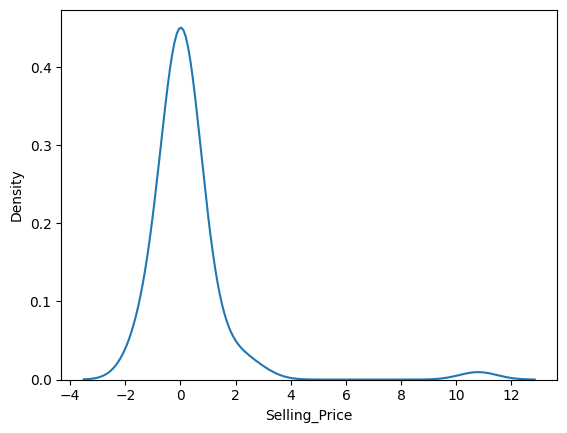

In [47]:
sns.kdeplot(y_test - y_pred)

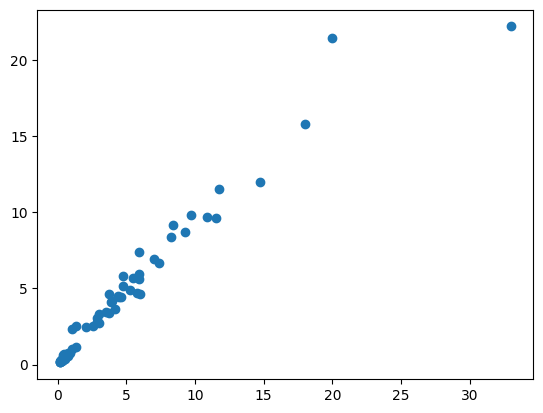

In [48]:
plt.scatter(y_test, y_pred) 

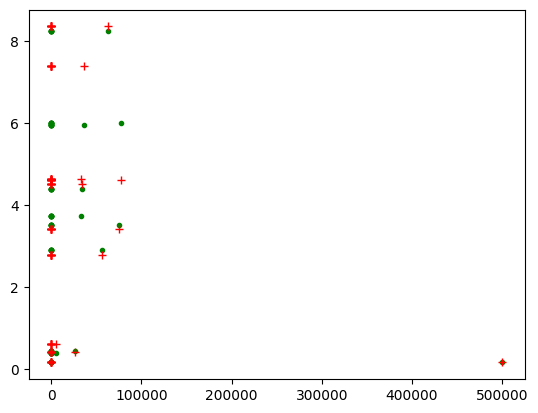

In [49]:
plt.plot(x_test[10:20], y_test[10:20], '.', color = 'green')
plt.plot(x_test[10:20], y_pred[10:20], '+', color = 'red')
plt.show()

In [50]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [51]:
# Giving a test data of a 1st car in the above dataset.
Test = [[5.59,27000, 0, 10, 0, 1, 0,1]]
# Present_Price, Kms_Driven, Owner, No_of_Years, Fuel_Type_Diesel, Fuel_Type_Petrol, Seller_Type_Individual, Transmission_Manual
prediction = linr.predict(Test)
prediction1 = rnd.predict(Test)

print(f"The actual cost of car is{df1.iloc[0:1,0:1]}, and predicted value of the same is {prediction} using Linear Regression")
print(f"The actual cost of car is{df1.iloc[0:1,0:1]}, and predicted value of the same is {prediction1} using Random Forest")

The actual cost of car is   Selling_Price
0           3.35, and predicted value of the same is [3.92678477] using Linear Regression
The actual cost of car is   Selling_Price
0           3.35, and predicted value of the same is [3.8135] using Random Forest


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## END